In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("heart_tidy.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,CholesterolLevel,FastingBloodSugar,RestingElectrocardiographicResult,MaxHeartRate,ExerciseAngina,STDepression,STSegmentSlope,NumMajorVessels,ThalliumStressRest,HeartDiseasePresent,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,NaN,NaN,NaN,NaN,NaN
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,NaN,NaN,NaN,NaN,NaN
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,NaN,NaN,NaN,NaN,NaN
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,NaN,NaN,NaN,NaN,NaN
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,NaN,NaN,NaN,NaN,NaN
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,NaN,NaN,NaN,NaN,NaN
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,NaN,NaN,NaN,NaN,NaN
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,NaN,NaN,NaN,NaN,NaN
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,NaN,NaN,NaN,NaN,NaN
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'],axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


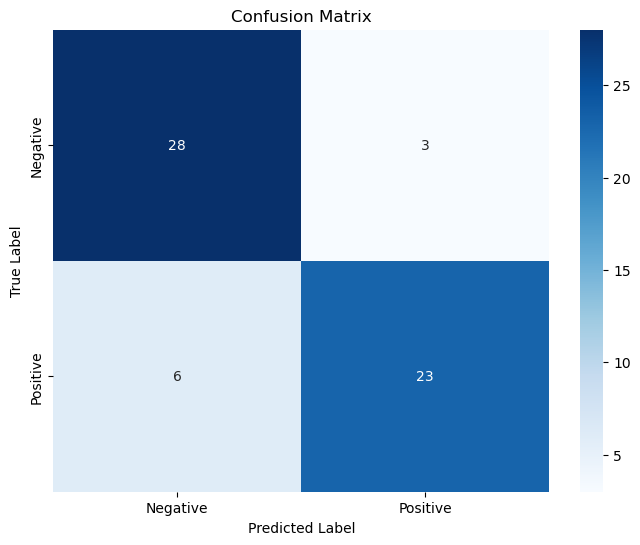

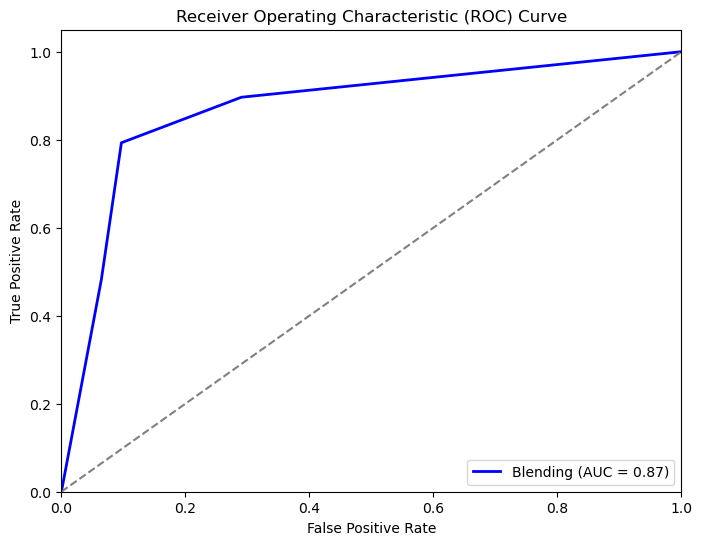

Accuracy: 0.85
Precision: 0.8846153846153846
Recall: 0.7931034482758621
F1 Score: 0.8363636363636363


In [6]:
X = df.drop('HeartDiseasePresent', axis=1)  # Features
y = df['HeartDiseasePresent']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

# Fit base models on training data
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions on validation set
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)

# Combine predictions to form a matrix
blending_pred = np.mean([rf_pred, lr_pred, knn_pred], axis=0)

# Convert probabilities to binary predictions
blending_pred_binary = np.where(blending_pred >= 0.5, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, blending_pred_binary)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, blending_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Blending (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, blending_pred_binary)
precision = precision_score(y_test, blending_pred_binary)
recall = recall_score(y_test, blending_pred_binary)
f1 = f1_score(y_test, blending_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)